In [2]:
import dlib
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
path = '/content/drive/MyDrive/Computer Vision Masterclass - Udemy/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [5]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/drive/MyDrive/Computer Vision Masterclass - Udemy/Weights/shape_predictor_68_face_landmarks.dat')

In [6]:
image = cv2.imread('/content/drive/MyDrive/Computer Vision Masterclass - Udemy/Images/people2.jpg')

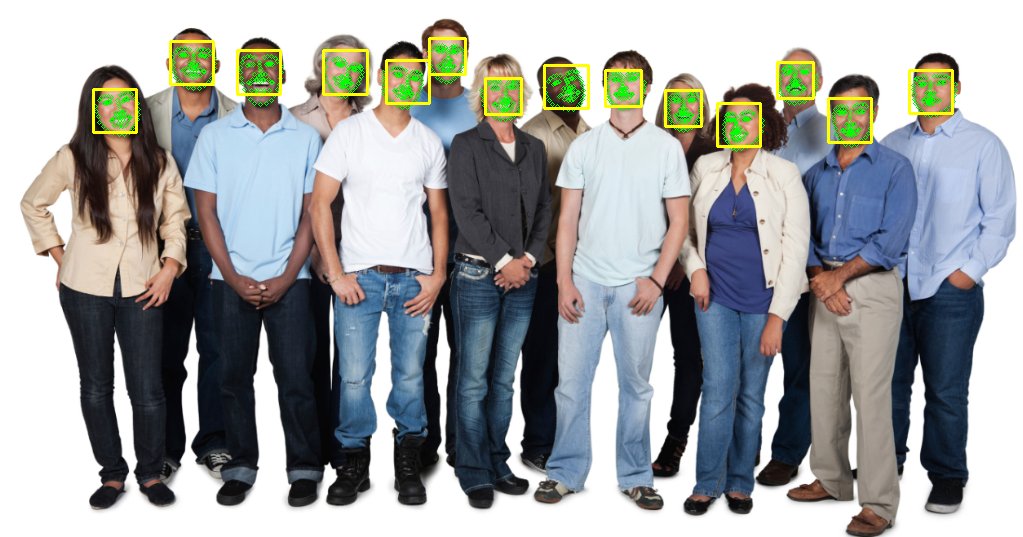

In [7]:
face_detection = face_detector(image,1)
for face in face_detection:

  points = points_detector(image, face)
  for point in points.parts():
    cv2.circle(image, (point.x, point.y), 2, (0,255,0), 1)
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l,t), (r,b), (0,255,255), 2)

cv2_imshow(image)

In [8]:
import os

In [9]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/drive/MyDrive/Computer Vision Masterclass - Udemy/Weights/shape_predictor_68_face_landmarks.dat')
face_descriptor_extractor = dlib.face_recognition_model_v1('/content/drive/MyDrive/Computer Vision Masterclass - Udemy/Weights/dlib_face_recognition_resnet_model_v1.dat')

In [10]:
index = {}
idx = 0
face_descriptors = None

In [11]:
paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]

for path in paths:
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8')
  face_detection = face_detector(image_np, 1)
  for face in face_detection:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image_np, (l,t), (r,b), (0,0,255), 2)

    points = points_detector(image_np, face)
    for point in points.parts():
      cv2.circle(image_np, (point.x, point.y), 2, (0,255,0), 1)

    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)

    face_descriptor = [f for f in face_descriptor]

    face_descriptor = np.asarray(face_descriptor, dtype=np.float64)

    face_descriptor = face_descriptor[np.newaxis, :]

    if face_descriptors is None:
      face_descriptors = face_descriptor
    else:
      face_descriptors = np.concatenate((face_descriptors, face_descriptor), axis = 0)

    index[idx] = path
    idx += 1

  #cv2_imshow(image_np)

In [12]:
face_descriptors.shape

(132, 128)

Calculating the distance between faces

In [14]:
face_descriptors[0]

array([-1.07598938e-01,  1.03364527e-01,  2.06654146e-02, -8.44339505e-02,
       -7.74224550e-02, -1.99824795e-02, -1.65834650e-02, -7.85760880e-02,
        1.18732654e-01,  1.64628215e-03,  2.68715620e-01,  2.38324329e-03,
       -1.88033804e-01, -6.21331781e-02,  1.75376683e-02,  1.06580615e-01,
       -8.89455453e-02, -7.94506818e-02, -1.09083295e-01, -1.17153734e-01,
        4.14874777e-03, -7.12006912e-03,  5.10020554e-03,  5.53422719e-02,
       -1.67963505e-01, -2.88972110e-01, -1.46394685e-01, -1.23483174e-01,
        2.28383616e-02, -1.64183408e-01, -2.61742771e-02, -3.73100042e-02,
       -2.35801265e-01, -6.67838231e-02, -4.94277328e-02,  2.95690298e-02,
       -7.18079358e-02, -1.06244475e-01,  1.23102844e-01,  6.81935996e-02,
       -1.01827942e-01,  5.27447164e-02,  7.08317161e-02,  2.02266425e-01,
        2.03994945e-01,  1.28881633e-02,  5.72280474e-02, -2.00092793e-04,
       -1.12458169e-02, -1.59851298e-01,  1.07182994e-01,  8.51024389e-02,
        1.19460724e-01,  

In [15]:
np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis = 1)[91]

0.5798193939889779

Detecting Faces with Dlib

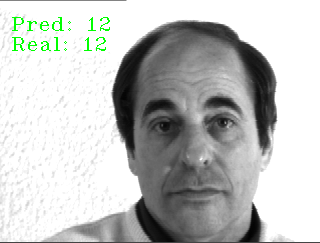

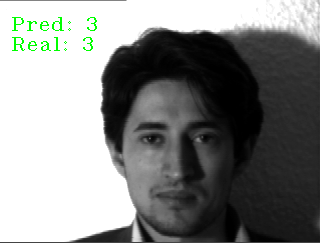

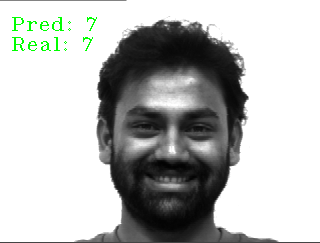

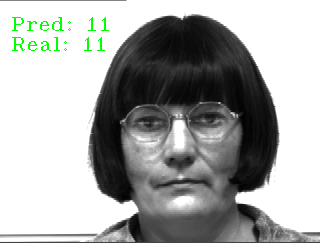

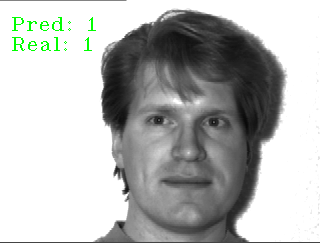

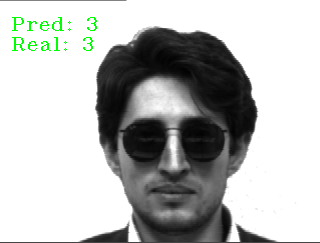

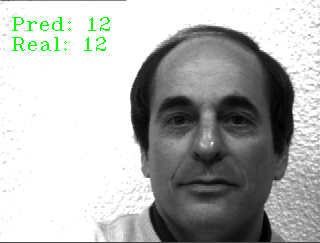

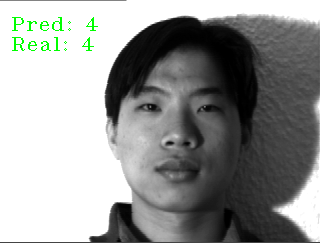

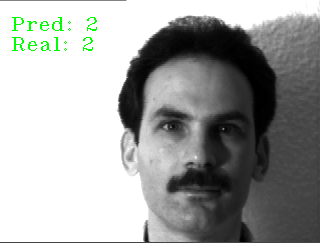

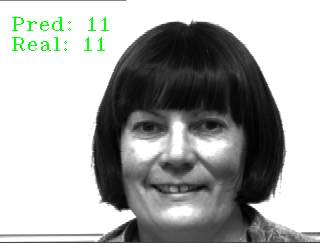

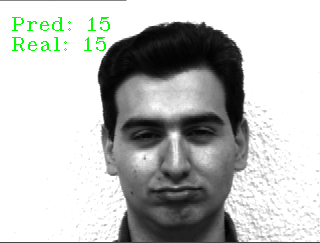

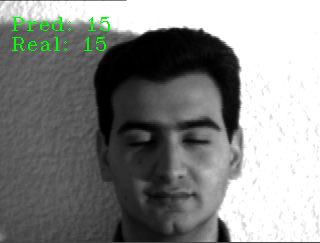

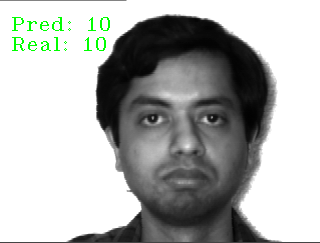

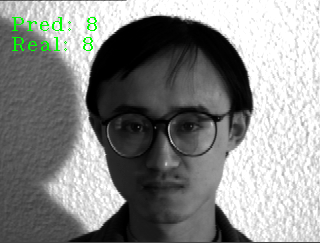

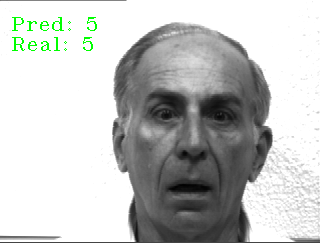

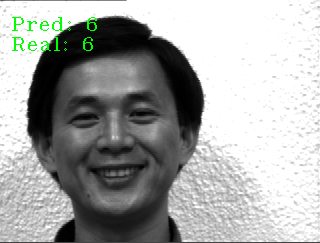

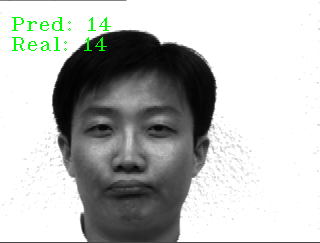

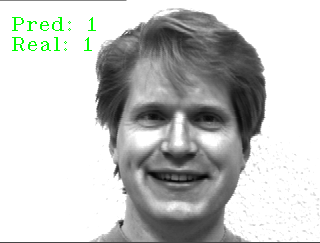

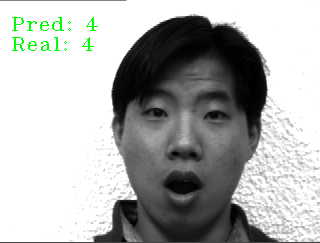

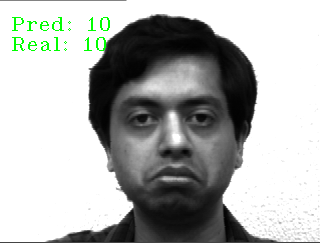

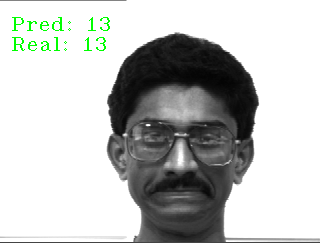

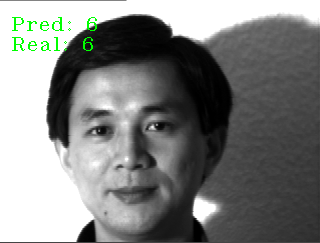

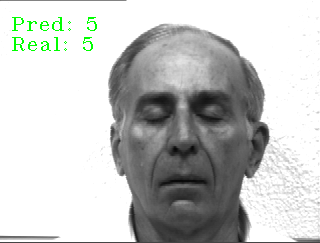

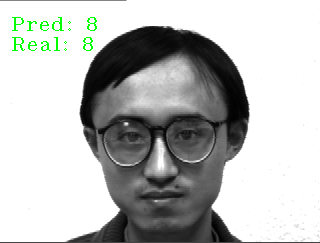

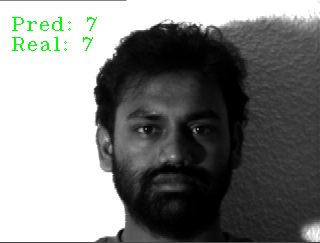

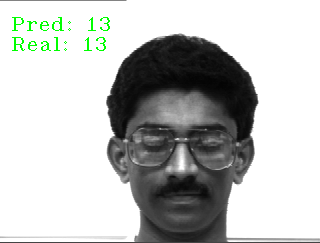

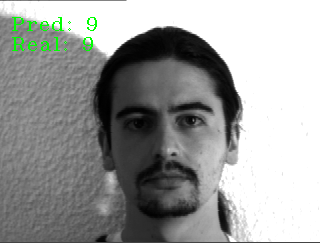

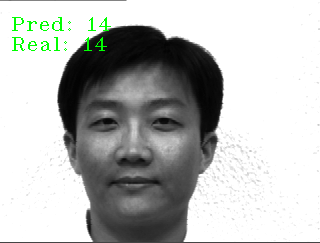

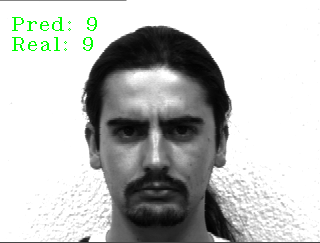

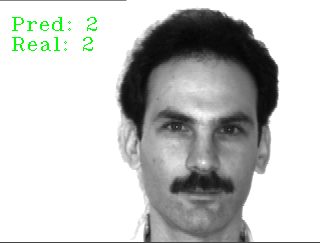

In [20]:
threshold = 0.5
predictions = []
expected_outputs = []

paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
for path in paths:
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8')
  face_detection = face_detector(image_np, 1)

  for face in face_detection:
    points = points_detector(image_np, face)
    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)

    face_descriptor = [f for f in face_descriptor]
    face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
    face_descriptor = face_descriptor[np.newaxis, :]

    distances = np.linalg.norm(face_descriptor - face_descriptors, axis = 1)

    min_index = np.argmin(distances)
    min_distance = distances[min_index]

    if min_distance <= threshold:
      name_pred = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject',''))
    else:
      name_pred = 'Not identified'

    name_real = int(os.path.split(path)[1].split('.')[0].replace('subject',''))

    predictions.append(name_pred)
    expected_outputs.append(name_real)

    cv2.putText(image_np, 'Pred: ' + str(name_pred), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
    cv2.putText(image_np, 'Real: ' + str(name_real), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
  cv2_imshow(image_np)

predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(expected_outputs, predictions)

1.0